In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

directory = 'data/raw/'
df_list = []

In [2]:
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        df_list.append(pd.read_json(f))

In [3]:
columns = []
for df in df_list:
    columns.append(df.columns)

In [4]:
df = pd.concat(df_list, axis=0)

In [5]:
df: pd.DataFrame

In [6]:
df.to_csv('data/merged.csv', index=False)

In [7]:
def check_nan(df: pd.DataFrame):
    return df.isna().sum()


In [8]:
df.describe()

,fw,lts,ttr,af,ttl,size,dup,rcvd,sent,min,max,avg,msm_id,prb_id,timestamp,group_id,step,stored_timestamp
count,13575.000000,1.357500e+04,7844.000000,13575.0,13258.000000,13575.0,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,13575.000000,1.357500e+04,1.357500e+04,13575,1.357500e+04,0.0,1.357500e+04
mean,5054.461878,1.129371e+05,714.306177,4.0,82.431588,48.0,0.000295,2.925599,2.940184,39.801644,42.466582,40.945053,5.258418e+07,1.340933e+05,2023-04-21 18:07:45.826519040,5.258418e+07,NaN,1.682101e+09
min,4740.000000,-1.000000e+00,0.653004,4.0,33.000000,48.0,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,5.094960e+07,3.700000e+01,2023-03-15 13:37:48,5.094960e+07,NaN,1.678887e+09
25%,5080.000000,1.500000e+01,19.641113,4.0,54.000000,48.0,0.000000,3.000000,3.000000,9.448666,10.064832,9.769561,5.137994e+07,1.487400e+04,2023-03-29 12:47:05,5.137994e+07,NaN,1.680094e+09
50%,5080.000000,3.400000e+01,37.904808,4.0,59.000000,48.0,0.000000,3.000000,3.000000,22.711767,23.967228,23.274960,5.246635e+07,2.758800e+04,2023-04-19 20:54:38,5.246635e+07,NaN,1.681938e+09
75%,5080.000000,6.900000e+01,67.781700,4.0,117.000000,48.0,0.000000,3.000000,3.000000,41.770405,44.314313,42.888202,5.375972e+07,5.185000e+04,2023-05-15 18:49:24,5.375972e+07,NaN,1.684177e+09
max,5080.000000,7.932454e+07,15124.210405,4.0,253.000000,48.0,2.000000,3.000000,3.000000,2881.238795,2881.238795,2881.238795,5.375973e+07,1.005745e+06,2023-05-15 18:50:50,5.375973e+07,NaN,1.684177e+09
std,78.237569,2.094447e+06,2473.831032,0.0,35.572375,0.0,0.021022,0.457961,0.413546,60.516059,65.208428,61.985299,1.025001e+06,3.050492e+05,NaN,1.025001e+06,NaN,1.853784e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13575 entries, 0 to 895
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                13575 non-null  int64         
 1   mver              12514 non-null  object        
 2   lts               13575 non-null  int64         
 3   dst_name          13575 non-null  object        
 4   ttr               7844 non-null   float64       
 5   af                13575 non-null  int64         
 6   dst_addr          13316 non-null  object        
 7   src_addr          13316 non-null  object        
 8   proto             13575 non-null  object        
 9   ttl               13258 non-null  float64       
 10  size              13575 non-null  int64         
 11  result            13575 non-null  object        
 12  dup               13575 non-null  int64         
 13  rcvd              13575 non-null  int64         
 14  sent              13575 non-n

In [10]:
check_nan(df)

fw                      0
mver                 1061
lts                     0
dst_name                0
ttr                  5731
af                      0
dst_addr              259
src_addr              259
proto                   0
ttl                   317
size                    0
result                  0
dup                     0
rcvd                    0
sent                    0
min                     0
max                     0
avg                     0
msm_id                  0
prb_id                  0
timestamp               0
msm_name                0
from                    0
type                    0
group_id                0
step                13575
stored_timestamp        0
dtype: int64

## Drop step column

In [11]:
df.drop(['step'], axis=1, inplace=True)

In [12]:
check_nan(df)

fw                     0
mver                1061
lts                    0
dst_name               0
ttr                 5731
af                     0
dst_addr             259
src_addr             259
proto                  0
ttl                  317
size                   0
result                 0
dup                    0
rcvd                   0
sent                   0
min                    0
max                    0
avg                    0
msm_id                 0
prb_id                 0
timestamp              0
msm_name               0
from                   0
type                   0
group_id               0
stored_timestamp       0
dtype: int64

In [13]:
df[['mver', 'ttl']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13575 entries, 0 to 895
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mver    12514 non-null  object 
 1   ttl     13258 non-null  float64
dtypes: float64(1), object(1)
memory usage: 318.2+ KB


## Dealing with 'mver' column

In [14]:
df['mver'].unique()

array(['2.2.1', '2.6.2', '2.4.1', '2.6.3', '2.3.2', '2.5.1', '2.4.0', nan,
       '2.6.1', '2.2.0', '2.4.2'], dtype=object)

In [15]:
# mver specifies the version of measurement code
df.drop(['mver'], axis=1, inplace=True)

## Dealing with 'ttl' column

In [16]:
df['ttl'].unique()

array([117., 115., 119., 121., 110.,  57., 118.,  56., 114., 122., 116.,
        58., 112., 120.,  60.,  59., 106.,  55., 113., 109., 107.,  52.,
        61.,  nan, 103., 111.,  54.,  62., 108., 242.,  46.,  49.,  53.,
        50.,  51.,  48.,  47.,  45., 251., 104., 105.,  99.,  96., 102.,
       100.,  98.,  94., 101.,  95.,  93.,  44.,  35.,  42., 249., 241.,
        63.,  36.,  40., 243., 235.,  43.,  33.,  34., 245., 248.,  41.,
       247.,  37., 244.,  38., 246., 250., 253., 232., 239.,  39.,  66.,
       236.])

<Axes: >

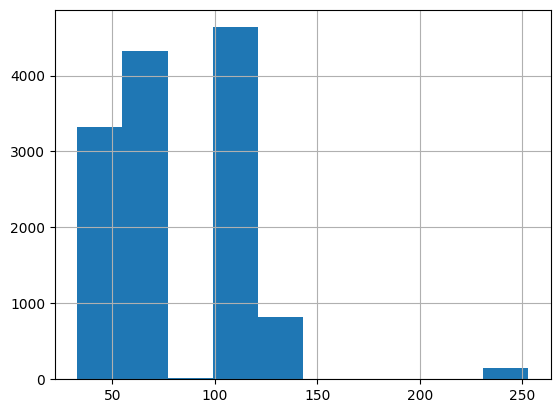

In [17]:
df['ttl'].hist()

In [18]:
# replace null in ttl column using median
df.fillna(df['ttl'].median(), inplace=True)

In [19]:
check_nan(df)

fw                  0
lts                 0
dst_name            0
ttr                 0
af                  0
dst_addr            0
src_addr            0
proto               0
ttl                 0
size                0
result              0
dup                 0
rcvd                0
sent                0
min                 0
max                 0
avg                 0
msm_id              0
prb_id              0
timestamp           0
msm_name            0
from                0
type                0
group_id            0
stored_timestamp    0
dtype: int64

In [20]:
df.drop(['result'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13575 entries, 0 to 895
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                13575 non-null  int64         
 1   lts               13575 non-null  int64         
 2   dst_name          13575 non-null  object        
 3   ttr               13575 non-null  float64       
 4   af                13575 non-null  int64         
 5   dst_addr          13575 non-null  object        
 6   src_addr          13575 non-null  object        
 7   proto             13575 non-null  object        
 8   ttl               13575 non-null  float64       
 9   size              13575 non-null  int64         
 10  dup               13575 non-null  int64         
 11  rcvd              13575 non-null  int64         
 12  sent              13575 non-null  int64         
 13  min               13575 non-null  float64       
 14  max               13575 non-n

In [22]:
df.drop(['dst_name', 'dst_addr', 'src_addr', 'proto'], axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13575 entries, 0 to 895
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                13575 non-null  int64         
 1   lts               13575 non-null  int64         
 2   ttr               13575 non-null  float64       
 3   af                13575 non-null  int64         
 4   ttl               13575 non-null  float64       
 5   size              13575 non-null  int64         
 6   dup               13575 non-null  int64         
 7   rcvd              13575 non-null  int64         
 8   sent              13575 non-null  int64         
 9   min               13575 non-null  float64       
 10  max               13575 non-null  float64       
 11  avg               13575 non-null  float64       
 12  msm_id            13575 non-null  int64         
 13  prb_id            13575 non-null  int64         
 14  timestamp         13575 non-n

In [24]:
# only one value Ping
df['msm_name'].unique()

array(['Ping'], dtype=object)

In [25]:
df.drop(['msm_name'], axis=1, inplace=True)

In [26]:
df['from'].unique()


array(['176.57.191.107', '45.91.92.191', '45.128.160.112', ...,
       '185.238.128.33', '145.238.186.110', '79.24.36.163'], dtype=object)

In [27]:
df.drop(['from'], axis=1, inplace=True)

In [28]:
# only one value Ping
df['type'].unique()


array(['ping'], dtype=object)

In [29]:
df.drop(['type'], axis=1, inplace=True)


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13575 entries, 0 to 895
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fw                13575 non-null  int64         
 1   lts               13575 non-null  int64         
 2   ttr               13575 non-null  float64       
 3   af                13575 non-null  int64         
 4   ttl               13575 non-null  float64       
 5   size              13575 non-null  int64         
 6   dup               13575 non-null  int64         
 7   rcvd              13575 non-null  int64         
 8   sent              13575 non-null  int64         
 9   min               13575 non-null  float64       
 10  max               13575 non-null  float64       
 11  avg               13575 non-null  float64       
 12  msm_id            13575 non-null  int64         
 13  prb_id            13575 non-null  int64         
 14  timestamp         13575 non-n

In [31]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='s')

Index(['ttl', 'prb_id', 'rcvd', 'sent', 'fw', 'lts', 'ttr', 'dup', 'max',
       'avg', 'min', 'stored_timestamp', 'msm_id', 'group_id', 'af', 'size'],
      dtype='object')


d:\Studia II\Sem_II\MaAoWbS\mobile-and-analysis-of-web-based-systems\.venv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\Studia II\Sem_II\MaAoWbS\mobile-and-analysis-of-web-based-systems\.venv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


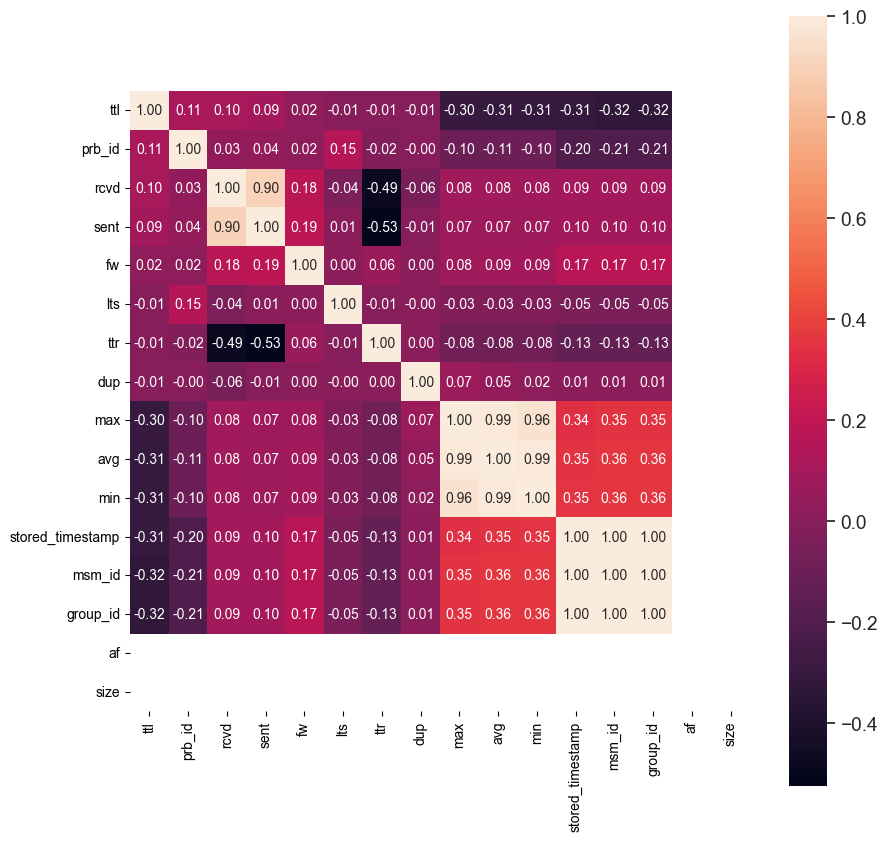

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Correlation matrix
corrmat = df[[col for col in df.columns if col != 'timestamp']].corr()

# Saleprice correlation matrix
k = 20 # numbers of variables in heatmap
cols = corrmat.nlargest(k, 'ttl')['ttl'].index
print(cols)
f, ax = plt.subplots(figsize=(10, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Text(0, 0.5, 'frequency')

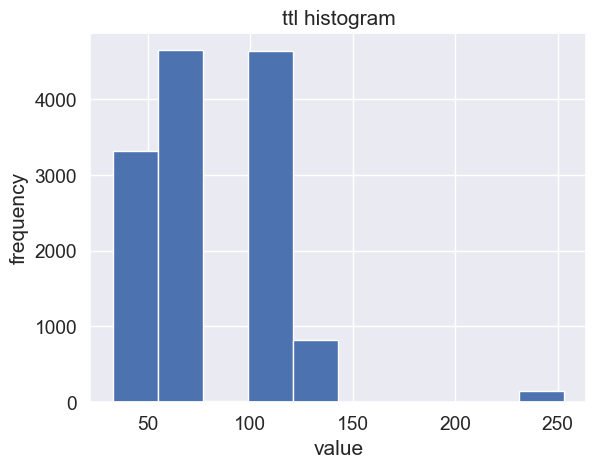

In [33]:
df['ttl'].hist()
plt.title('ttl histogram')
plt.xlabel('value')
plt.ylabel('frequency')

<Axes: xlabel='timestamp', ylabel='ttl'>

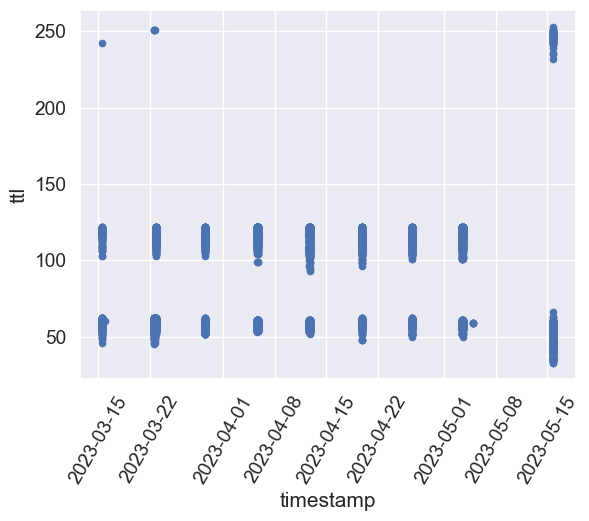

In [34]:
df.plot.scatter(x='timestamp', y='ttl', rot=60)

In [35]:
# Delete those rows?
df[df['sent'] != df['rcvd']]

,fw,lts,ttr,af,ttl,size,dup,rcvd,sent,min,max,avg,msm_id,prb_id,timestamp,group_id,stored_timestamp
123,5080,23,57.265417,4,114.0,48,0,2,3,32.903083,33.000209,32.951646,50949595,53055,2023-03-15 13:37:51,50949595,1678887471
154,5080,53,873.500275,4,59.0,48,0,0,3,-1.000000,-1.000000,-1.000000,50949718,6275,2023-03-15 13:54:21,50949718,1678888462
40,5080,20,267.588651,4,59.0,48,0,0,3,-1.000000,-1.000000,-1.000000,51187029,12571,2023-03-22 13:51:49,51187029,1679493121
40,5080,27,271.104005,4,59.0,48,0,0,3,-1.000000,-1.000000,-1.000000,51187385,12571,2023-03-22 14:21:41,51187385,1679494906
44,5080,8,291.534597,4,59.0,48,0,0,3,-1.000000,-1.000000,-1.000000,51188629,12571,2023-03-22 15:31:01,51188629,1679499061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,5080,27,59.000000,4,59.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759726,51101,2023-05-15 18:49:44,53759726,1684176585
338,5070,193,59.000000,4,47.0,48,0,2,3,112.388167,112.685416,112.536792,53759726,51482,2023-05-15 18:49:44,53759726,1684176584
848,5080,26,59.000000,4,50.0,48,0,1,2,190.164334,190.164334,190.164334,53759726,53601,2023-05-15 18:49:46,53759726,1684176585
853,5080,29,59.000000,4,59.0,48,0,0,3,-1.000000,-1.000000,-1.000000,53759726,53620,2023-05-15 18:49:46,53759726,1684176585


In [36]:
df.to_csv(os.path.join('data', 'processed.csv'), index=False)

In [37]:
df

,fw,lts,ttr,af,ttl,size,dup,rcvd,sent,min,max,avg,msm_id,prb_id,timestamp,group_id,stored_timestamp
0,5020,27,13.350783,4,117.0,48,0,3,3,0.836993,0.881792,0.854291,50949595,1000518,2023-03-15 13:37:51,50949595,1678887471
1,5080,12,22.449198,4,115.0,48,0,3,3,7.937588,8.037138,7.990553,50949595,1001200,2023-03-15 13:37:50,50949595,1678887470
2,5020,4,65.007328,4,115.0,48,0,3,3,34.585689,34.671303,34.641703,50949595,1002099,2023-03-15 13:37:50,50949595,1678887471
3,5080,22,43.548034,4,119.0,48,0,3,3,24.816249,24.930937,24.891368,50949595,1002205,2023-03-15 13:37:50,50949595,1678887470
4,5080,12,13.308441,4,121.0,48,0,3,3,3.355540,3.451388,3.415008,50949595,1002210,2023-03-15 13:37:49,50949595,1678887470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,5080,96,59.000000,4,52.0,48,0,3,3,25.680500,26.924708,26.233055,53759726,53749,2023-05-15 18:49:45,53759726,1684176584
892,5080,21,59.000000,4,53.0,48,0,3,3,8.495208,8.800000,8.620847,53759726,53754,2023-05-15 18:49:44,53759726,1684176585
893,5080,27,59.000000,4,45.0,48,0,3,3,50.635125,51.349750,50.914861,53759726,53962,2023-05-15 18:49:44,53759726,1684176584
894,5080,43,59.000000,4,52.0,48,0,3,3,114.468918,118.128364,115.746388,53759726,1000879,2023-05-15 18:50:07,53759726,1684176608
